## Data Analysis with Python: Zero to Pandas - Course Project Guidelines
#### (remove this cell before submission)

Important links:
- Make submissions here: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Ask questions here: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
- Find interesting datasets here: https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711


This is the starter notebook for the course project for [Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas). You will pick a real-world dataset of your choice and apply the concepts learned in this course to perform exploratory data analysis. Use this starter notebook as an outline for your project . Focus on documentation and presentation - this Jupyter notebook will also serve as a project report, so make sure to include detailed explanations wherever possible using Markdown cells.

### Evaluation Criteria

Your submission will be evaluated using the following criteria:

* Dataset must contain at least 3 columns and 150 rows of data
* You must ask and answer at least 4 questions about the dataset
* Your submission must include at least 4 visualizations (graphs)
* Your submission must include explanations using markdown cells, apart from the code.
* Your work must not be plagiarized i.e. copy-pasted for somewhere else.


Follow this step-by-step guide to work on your project.


### Step 1: Select a real-world dataset 

- Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
- The data should be in CSV format, and should contain at least 3 columns and 150 rows
- Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

Here's some sample code for downloading the [US Elections Dataset](https://www.kaggle.com/tunguz/us-elections-dataset):

```
import opendatasets as od
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset'
od.download('https://www.kaggle.com/tunguz/us-elections-dataset')
```

You can find a list of recommended datasets here: https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711

### Step 2: Perform data preparation & cleaning

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


### Step 3: Perform exploratory analysis & visualization

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

### Step 4: Ask & answer questions about the data

- Ask at least 4 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


### Step 5: Summarize your inferences & write a conclusion

- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections
- Share ideas for future work on the same topic using other relevant datasets
- Share links to resources you found useful during your analysis


### Step 6: Make a submission & share your work

- Upload your notebook to your Jovian.ml profile using `jovian.commit`.
- **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
- Browse through projects shared by other participants and give feedback


### (Optional) Step 7: Write a blog post

- A blog post is a great way to present and showcase your work.  
- Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
- Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
- Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml





### Example Projects

Refer to these projects for inspiration:

* [Analyzing StackOverflow Developer Survey Results](https://jovian.ml/aakashns/python-eda-stackoverflow-survey)

* [Analyzing Covid-19 data using Pandas](https://jovian.ml/aakashns/python-pandas-data-analysis) 

* [Analyzing your browser history using Pandas & Seaborn](https://medium.com/free-code-camp/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51) by Kartik Godawat

* [WhatsApp Chat Data Analysis](https://jovian.ml/PrajwalPrashanth/whatsapp-chat-data-analysis) by Prajwal Prashanth

* [Understanding the Gender Divide in Data Science Roles](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b) by Aakanksha N S

* [2019 State of Javscript Survey Results](https://2019.stateofjs.com/demographics/)

* [2020 Stack Overflow Developer Survey Results](https://insights.stackoverflow.com/survey/2020)



**NOTE**: Remove this cell containing the instructions before making your submission. You can do using the "Edit > Delete Cells" menu option.

# Project Title - change this

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [14]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [15]:
# Change this
dataset_url = 'https://www.kaggle.com/aayushmishra1512/twitchdata' 

In [16]:
import opendatasets as od
od.download(dataset_url)

Kaggle dataset ID:  aayushmishra1512/twitchdata
Using downloaded and verified file: .\twitchdata.zip
Extracting archive .\twitchdata.zip to .\twitchdata


The dataset has been downloaded and extracted.

In [17]:
# Change this
data_dir = './twitchdata'

In [18]:
import os
os.listdir(data_dir)

['twitchdata-update.csv']

Let us save and upload our work to Jovian before continuing.

In [19]:
project_name = "analyzing-twitch-streamer-data" # change this (use lowercase letters and hyphens only)

In [20]:
!pip install jovian --upgrade -q

In [21]:
import jovian

In [22]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "201812311/analyzing-twitch-streamer-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/201812311/analyzing-twitch-streamer-data


'https://jovian.ml/201812311/analyzing-twitch-streamer-data'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

Before we do anything, let's import every external python module we need in this notebook.

In [45]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("./twitchdata/twitchdata-update.csv")

After we read the dataset in this notebook, let's familiarize ourselves in the dataset that we are working on by using the `head()` method.

In [31]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


Let's also check how many rows, non-nulls and memory usage of the dataset by using the `info()` method.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


This provides an overview of what we are dealing with. 

We can see some overview of information, let's break it down:
1. The dataset contains 1000 entries (0 - 999)
2. We have 11 columns (0 - 10)
3. We have 1000 entries that have non-null entries
4. We have 2 boolean, 7 integers and 2 strins
5. Our memory is only 72.4+ KB

To give emphasize on this information, I will provide another methods to accomplish this individually.

In [40]:
df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

Here what we did is chained `isnull()` and `sum()` to find how many entries in each column have null values. We can see that we don't have any.

In [41]:
df.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

By using `dtypes`, we are provided with much detailed information about the data type of each column

Next up, I am going to provide charts and statistics to better understand the dataset that we have and answer some questions. 

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "201812311/analyzing-twitch-streamer-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/201812311/analyzing-twitch-streamer-data


'https://jovian.ml/201812311/analyzing-twitch-streamer-data'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [86]:
sns.set_style('darkgrid',  {"axes.facecolor": ".5"})
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Providing a statistics in this stage is useful in understanding if there are outliers in our data. Using 

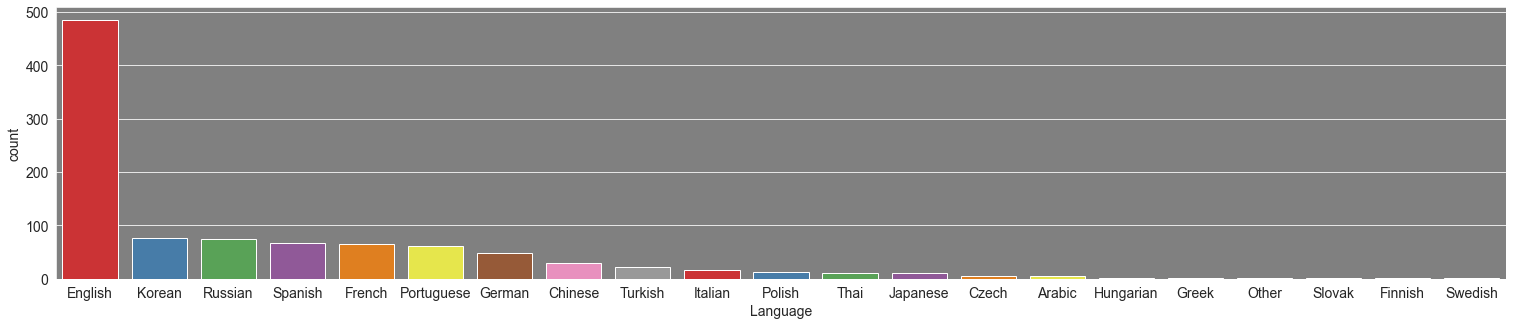

We can clearly see in the plot that the most number of language delivery is "**English**". By providing the `order` parameter in `sns.countplot` We can see that "**Korean**" is comming in for 2nd followed by "**Russian**".

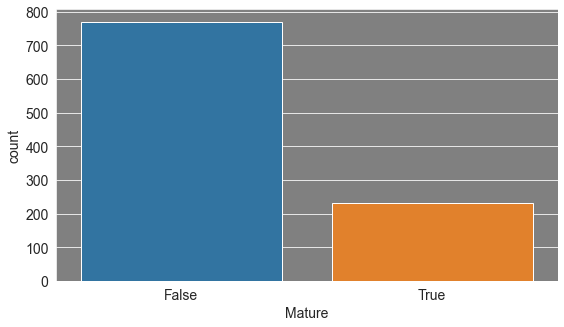

We can see that a lot of streamers in our dataset are mostly young lads by a huge margin. Its never too late to start being a Game Streamer I guess..

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Let us save and upload our work to Jovian before continuing

In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: Since we have a `Language` column for each streamer about their language delivery, let's plot it to understand the distribution of stremears based on language. 

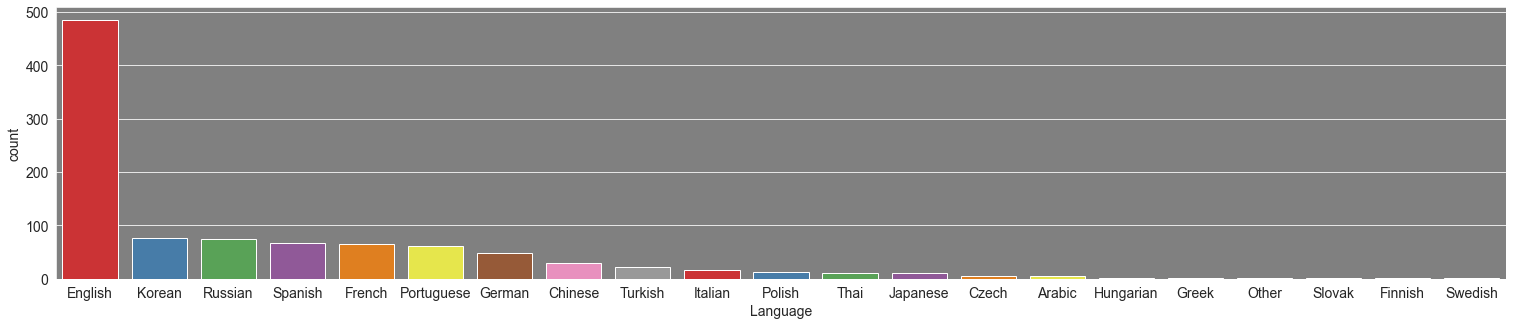

In [93]:
plt.figure(figsize=(26, 5))
plot = sns.countplot(x="Language", data=df, order=df["Language"].value_counts().index, palette="Set1")

#### Q2: Next up, let's see if most of the streamers in the dataset are at a legal age (18 yrs and above) or not.

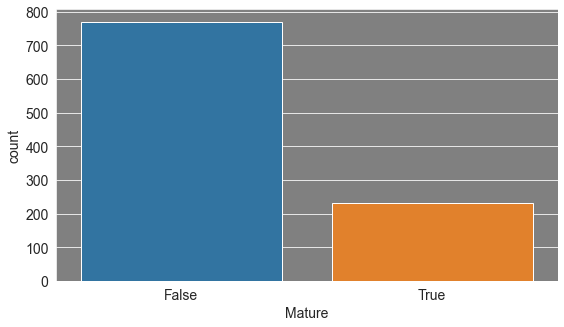

In [94]:
plot = sns.countplot(x="Mature", data=df, order=df["Mature"].value_counts().index)

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [32]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'